<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.1 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [2]:
import pandas as pd
import numpy as np
import pandas as pd

%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Use what you have learned so far. Be creative. List all your findings.

In [3]:
# Read CSV
house = pd.read_csv("Sacramento_transactions.csv")

In [4]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


In [5]:
house.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [6]:
# Identify duplicated values
dup = house.duplicated(subset=['street', 'city', 'zip', 'state'], keep=False)
house[dup]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
341,4734 14TH AVE,SACRAMENTO,95820,CA,2,1,834,Residential,Mon May 19 00:00:00 EDT 2008,68000,38.539447,-121.450858
342,4734 14TH AVE,SACRAMENTO,95820,CA,2,1,834,Residential,Mon May 19 00:00:00 EDT 2008,68000,38.539447,-121.450858
393,1223 LAMBERTON CIR,SACRAMENTO,95838,CA,3,2,1370,Residential,Mon May 19 00:00:00 EDT 2008,155435,38.646677,-121.437573
394,1223 LAMBERTON CIR,SACRAMENTO,95838,CA,3,2,1370,Residential,Mon May 19 00:00:00 EDT 2008,155500,38.646677,-121.437573
403,8306 CURLEW CT,CITRUS HEIGHTS,95621,CA,4,2,1280,Residential,Mon May 19 00:00:00 EDT 2008,167293,38.715781,-121.298519
404,8306 CURLEW CT,CITRUS HEIGHTS,95621,CA,4,2,1280,Residential,Mon May 19 00:00:00 EDT 2008,167293,38.715781,-121.298519
600,7 CRYSTALWOOD CIR,LINCOLN,95648,CA,0,0,0,Residential,Mon May 19 00:00:00 EDT 2008,4897,38.885962,-121.289436
601,7 CRYSTALWOOD CIR,LINCOLN,95648,CA,0,0,0,Residential,Mon May 19 00:00:00 EDT 2008,4897,38.885962,-121.289436


In [7]:
# Drop duplicated values 
house.drop_duplicates(inplace=True)
error = house[house.sq__ft == 0]
error.shape

(170, 12)

In [8]:
# Drop 0 value in sq__ft features, because a house cant have 0 sqft
df = house[house.sq__ft != 0]
print(house.shape, df.shape)

(982, 12) (812, 12)


In [9]:
df.reset_index()
df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

In [10]:
# Target variable is the price. Because we want to know the values of this variable. In other words, we want to predict the
# values of price, given some known factors. 

target = df['price'].values
print(target[:5])

[59222 68212 68880 69307 81900]


#### 2.2 List all possible variables which might be Predictor variable.

In [11]:
# All other features (excluded price features) can be Independent/Predictor variable

feature = house.drop('price', axis=1)
print(feature.columns)

Index(['street', 'city', 'zip', 'state', 'beds', 'baths', 'sq__ft', 'type',
       'sale_date', 'latitude', 'longitude'],
      dtype='object')


#### 2.2 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

In [12]:
# The best predictor are baths, beds, sq_ft, longtitude and latitude features. Because these features have high value of
# correlation to price

corr = df.corr().abs().unstack().sort_values(ascending=False).reset_index()
corr.rename(columns={'level_0': 'feature1', 'level_1': 'feature2', 0: 'Correlation'}, inplace=True)
price_corr = corr[corr.feature1 == 'price']
price_corr.head(10)

,feature1,feature2,Correlation
4,price,price,1.000000
11,price,sq__ft,0.693054
17,price,baths,0.500755
19,price,beds,0.441491
23,price,longitude,0.278237
25,price,zip,0.220222
46,price,latitude,0.058807


#### 2.3 What is the simplest way to predict price

So we have information for 985 houses. What is the easiest way to predict price of a house?

In [13]:
# ANSWER: The Mean of Price, without any models.
df['y_hat'] = df['price'].mean()

<ipython-input-13-8444a11c3bf4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y_hat'] = df['price'].mean()


#### 2. 4 Find Resudals

Find difference between actual value and predicted value. Use absolute value.

In [15]:
# ANSWER: 
res = abs(df['price'] - df['y_hat']).mean()
res

88220.96815016137

#### 2.5  Predict Using Linear Regression

[Simple Linear Regression](https://en.wikipedia.org/wiki/Simple_linear_regression#Fitting_the_regression_line)

### $$\hat{y} = \beta_0 + \beta_1 x$$

> ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

and

> ### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

Given variables:
- $\bar{y}$ : the sample mean of observed values $Y$
- $\bar{x}$ : the sample mean of observed values $X$

In [21]:
def cal_beta_1(X,Y):
    Xbar = X.mean()
    Ybar = Y.mean()
    
    n = np.sum((Y - Ybar) * (X - Xbar))
    d = np.sum(np.square(X - Xbar))
    
    beta_1 = n/d
    return beta_1 

In [16]:
def cal_beta_0(beta1, Xbar, Ybar):
    beta_0 = Ybar - beta1 * Xbar
    return beta_0

In [17]:
def cal_yhat(beta0, beta1, x):
    y_hat = beta0 + beta1 * x 
    return y_hat

##### 2.5 Define X, Y

- X = Predictor Variable 
- Y = Target Variable

In [18]:
df.columns

Index(['street', 'city', 'zip', 'state', 'beds', 'baths', 'sq__ft', 'type',
       'sale_date', 'price', 'latitude', 'longitude', 'y_hat'],
      dtype='object')

In [91]:
# ANSWER
X = df['sq__ft']
y = df['price']
X_bar = X.mean()
y_bar = y.mean()

##### 2.5.A Calculate beta_1

 ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

In [92]:
# ANSWER
beta1 = cal_beta_1(X,y)
beta1

125.05487806008611

##### 2.5.B Calculate beta_0

### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

In [93]:
# ANSWER
beta0 = cal_beta_0(beta1, X_bar, y_bar)
beta0

30578.62479426342

##### 2.4.C Find Yhat (Predicted Value Using Beta 0 and Beta 1)

### $$\hat{y} = \beta_0 + \beta_1 x$$

In [94]:
# ANSWER
y_hat = cal_yhat(beta0, beta1, X)
print(y_hat)

0      135124.502852
1      176517.667490
2      130122.307730
3      137125.380901
4      130247.362608
           ...      
980    315703.746771
981    215284.679689
982    182645.356515
983    241296.094326
984    200903.368712
Name: sq__ft, Length: 812, dtype: float64


##### 2.5.D Find Resudals

### $$ \text{residual}_i = y_i - \hat{y}_i$$

In [95]:
residual = y - y_hat
print(residual)

0      -75902.502852
1     -108305.667490
2      -61242.307730
3      -67818.380901
4      -48347.362608
           ...      
980    -83278.746771
981     18715.320311
982     52354.643485
983     -5995.094326
984     34834.631288
Length: 812, dtype: float64


##### 2.5.D Find R-Square

The coefficient $R^2$ is defined as $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$, where $$ SS_{res} $$ is the residual sum of squares $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$ and $$ SS_{res} $$ is the total sum of squares $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

**Write a function to calculate R- Square value.**

The total sum of squares:

### $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The residual sum of squares:

### $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$

$R^2$:

### $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$

In [96]:
def cal_total_ss(y, ybar):
    total_ss = np.sum(np.square(y - ybar))
    return total_ss

In [97]:
def cal_residual_ss(y, yhat):
    total_residual = np.sum(np.square(y - yhat))
    return total_residual

In [98]:
def r_square(total_ss, total_residual):
    r_square = 1 - (total_residual/ total_ss)
    return r_square

In [99]:
sst = cal_total_ss(y, y_bar)
print(f' Total Sum of Squares: {sst}')

 Total Sum of Squares: 11643200694554.719


In [100]:
ssr = cal_residual_ss(y, y_hat)
print(f'Residual Sum of Squares: {ssr}')

Residual Sum of Squares: 6050694716455.076


In [101]:
r2 = r_square(sst, ssr)
print(f'R Square Score: {r2}')

R Square Score: 0.4803237636121088


##### 2.5.G [BONUS] Draw Plot of Predicted Line

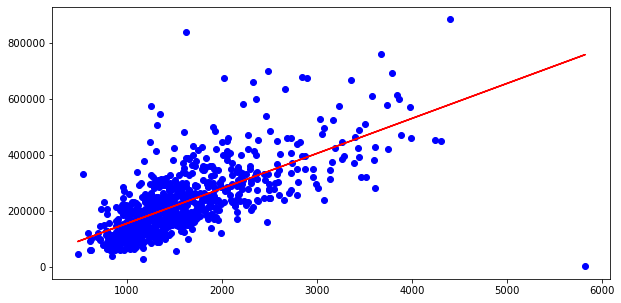

In [102]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.scatter(X, y, color='b')
plt.plot(X, y_hat, color='r')

##### 2.5.G [BONUS] Draw Plot of Predicted Line With Resudals

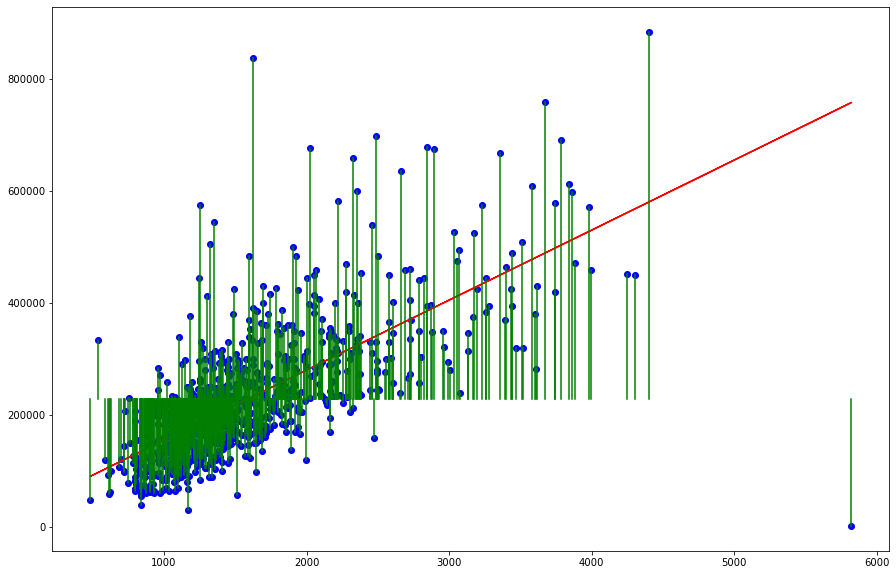

In [109]:
plt.figure(figsize=(15,10))
plt.scatter(X, y, color='b')
plt.plot(X, y_hat, color='r')
for _, row in df.iterrows():
    plt.plot((row['sq__ft'], row['sq__ft']), (row['price'], row['y_hat']), 'g-')

### 3. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house.**

In [105]:
result = beta0 + beta1 * 1204 
print(result)

181144.6979786071




---



---



> > > > > > > > > © 2019 Institute of Data


---



---



